# Jupyter Notebook for Task 4: Modeling

#### Preparation

In [48]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

aggregated_data = pd.read_pickle(os.path.join('Data', 'aggregated_data.pkl'))
aggregated_data.head()

,activeSessions_site1,utilizationRate_site1,kWhDelivered_site1,idleRate_site1,blockedRate_site1,activeSessions_site2,utilizationRate_site2,kWhDelivered_site2,idleRate_site2,blockedRate_site2,...,cloud_cover_description,pressure,windspeed,precipitation,hour_of_day,week_of_year,day_of_week,month_of_year,is_weekend,date
start_hour,,,,,,,,,,,,,,,,,,,,,
2018-04-25 04:00:00-07:00,0,0.0,0.0,0.0,0.0,1,0.016029,3.118359,1.000000,0.000000,...,Partly Cloudy,987.47,7.0,0.0,4,17,2,4,False,2018-04-25
2018-04-25 05:00:00-07:00,0,0.0,0.0,0.0,0.0,1,0.018519,3.602725,1.000000,0.000000,...,Partly Cloudy,987.80,15.0,0.0,5,17,2,4,False,2018-04-25
2018-04-25 06:00:00-07:00,0,0.0,0.0,0.0,0.0,3,0.015175,3.170394,1.000000,0.000000,...,Fair,988.45,9.0,0.0,6,17,2,4,False,2018-04-25
2018-04-25 07:00:00-07:00,0,0.0,0.0,0.0,0.0,7,0.059378,12.224048,0.957030,0.002551,...,Fair,988.78,13.0,0.0,7,17,2,4,False,2018-04-25
2018-04-25 08:00:00-07:00,0,0.0,0.0,0.0,0.0,22,0.253596,36.984350,0.926976,0.018519,...,Fair,988.78,13.0,0.0,8,17,2,4,False,2018-04-25


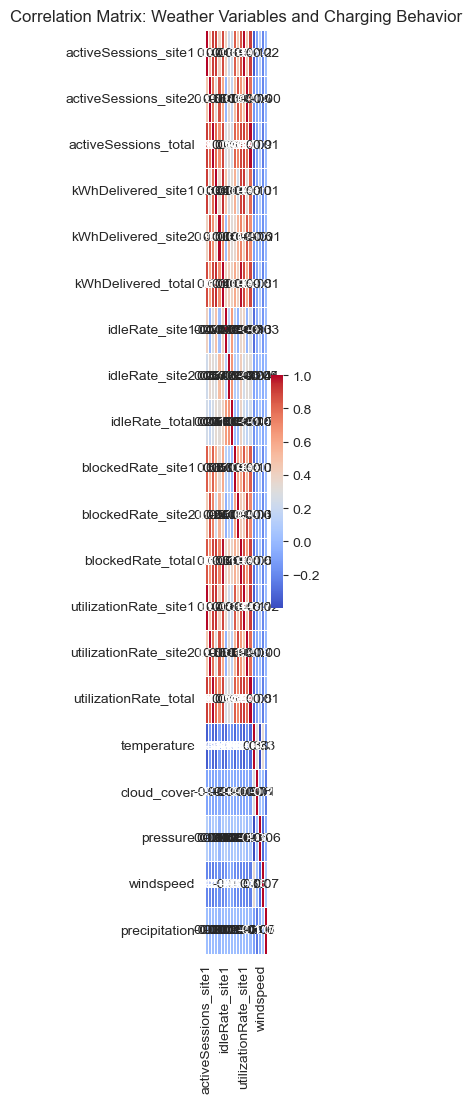

In [49]:
# Compute the correlation matrix
correlation_matrix = aggregated_data[
    ['activeSessions_site1', 'activeSessions_site2', 'activeSessions_total', 'kWhDelivered_site1', 'kWhDelivered_site2',
     'kWhDelivered_total', 'idleRate_site1', 'idleRate_site2', 'idleRate_total', 'blockedRate_site1', 'blockedRate_site2', 'blockedRate_total', 'utilizationRate_site1', 'utilizationRate_site2', 'utilizationRate_total', 'temperature', 'cloud_cover',
     'pressure', 'windspeed', 'precipitation']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(1, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Weather Variables and Charging Behavior')
plt.show()

## 1 Cross Validation

Before developing different models for predicting hourly utilization of the sites, we will divide the `aggregated_data` from Task 2 into training and holdout sets. This partitioning is essential for obtaining an unbiased estimate of model performance on unseen data.

In [76]:
from sklearn.model_selection import train_test_split

# # Cross Validation for utilizationRate_site1
# train_X_ur1, test_X_ur1, train_y_ur1, test_y_ur1 = train_test_split(
#     aggregated_data[['hour_of_day', 'week_of_year', 'day_of_week',
#        'month_of_year', 'is_weekend', 'temperature', 'cloud_cover', 'pressure', 'windspeed', 'precipitation']],
#     aggregated_data[['utilizationRate_site1']], test_size=0.3)
#
# # Cross Validation for utilizationRate_site2
# train_X_ur2, test_X_ur2, train_y_ur2, test_y_ur2 = train_test_split(
#     aggregated_data[['hour_of_day', 'week_of_year', 'day_of_week',
#        'month_of_year', 'is_weekend', 'temperature', 'cloud_cover', 'pressure', 'windspeed', 'precipitation']],
#     aggregated_data[['utilizationRate_site2']], test_size=0.3)
#
# # Cross Validation for kWhDelivered_total
# train_X_kWh, test_X_kWh, train_y_kWh, test_y_kWh = train_test_split(
#     aggregated_data[['hour_of_day', 'week_of_year', 'day_of_week',
#        'month_of_year', 'is_weekend', 'temperature', 'cloud_cover', 'pressure', 'windspeed', 'precipitation']],
#     aggregated_data[['kWhDelivered_total']], test_size=0.3)

start_date = pd.Timestamp('2020-11-19', tz='UTC')
# end_date = pd.Timestamp('2021-07-01', tz='UTC')
#
# # Cross Validation for kWhDelivered_total
# train_X_kWh = aggregated_data[['kWhDelivered_total']].loc[start_date:end_date]
# test_X_kWh = aggregated_data[['kWhDelivered_total']].loc[end_date:]

relevant_data_kWh = aggregated_data[['kWhDelivered_total']].loc[start_date:]
data_length = len(relevant_data_kWh)
# Index für die Aufteilung in Train und Test berechnen (80% Train, 20% Test)
train_end_index = int(data_length * 0.8)

train_X_kWh = relevant_data_kWh.iloc[:train_end_index]
test_X_kWh = relevant_data_kWh.iloc[train_end_index:]


***

## 2 ARIMA Model
### 2.1 Decompositioning

In [62]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=168).mean()
    rolstd = timeseries.rolling(window=168).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:\n')
    dftest = adfuller(timeseries, maxlag=168, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = "{:,.4f}".format(value)  # Change the format specifier here
    print(dfoutput)

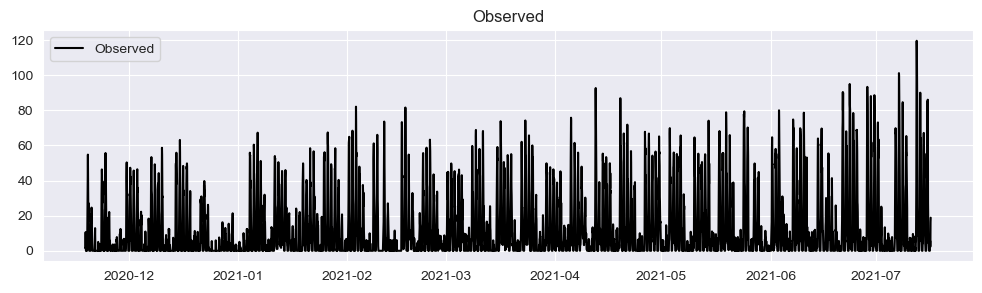

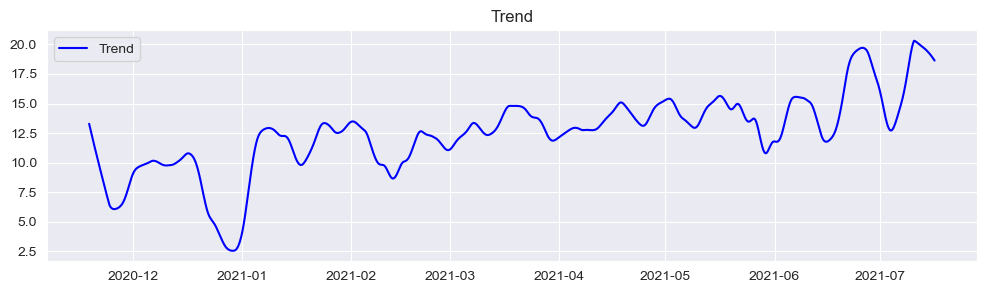

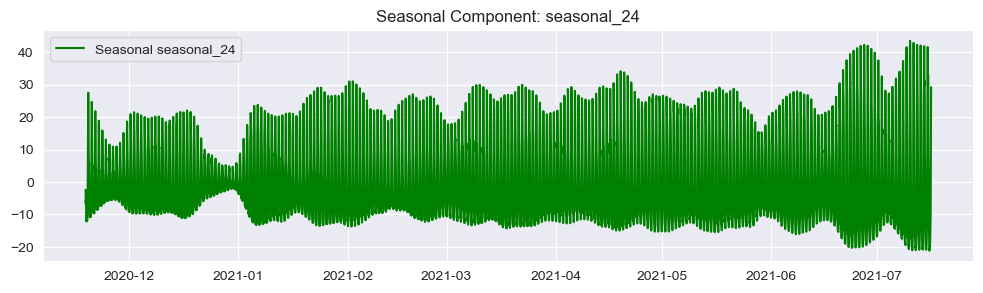

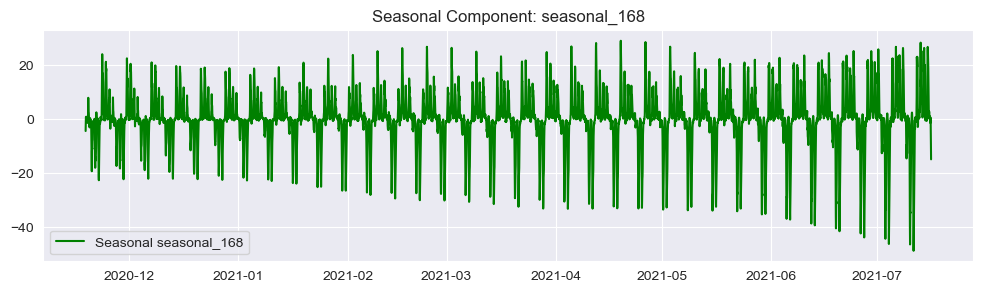

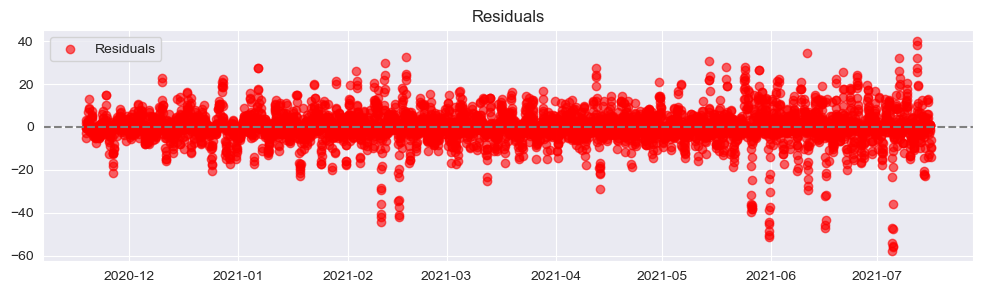

In [77]:
from statsmodels.tsa.seasonal import MSTL

res = MSTL(train_X_kWh, periods=(24, 24*7)).fit()
# Komponenten aus dem res-Objekt extrahieren
observed = res.observed
trend = res.trend
seasonal = res.seasonal
residuals = res.resid

# Plot für die beobachteten Daten
plt.figure(figsize=(12, 3))
plt.plot(observed, label='Observed', color='black')
plt.title('Observed')
plt.legend()

# Plot für den Trend
plt.figure(figsize=(12, 3))
plt.plot(trend, label='Trend', color='blue')
plt.title('Trend')
plt.legend()

# Plot für jede saisonale Komponente
for col in seasonal.columns:
    plt.figure(figsize=(12, 3))
    plt.plot(seasonal[col], label=f'Seasonal {col}', color='green')
    plt.title(f'Seasonal Component: {col}')
    plt.legend()

# Plot für die Residuen
plt.figure(figsize=(12, 3))
plt.scatter(residuals.index, residuals, label='Residuals', color='red', alpha=0.6)
plt.axhline(0, linestyle='--', color='gray')
plt.title('Residuals')
plt.legend()
plt.show()



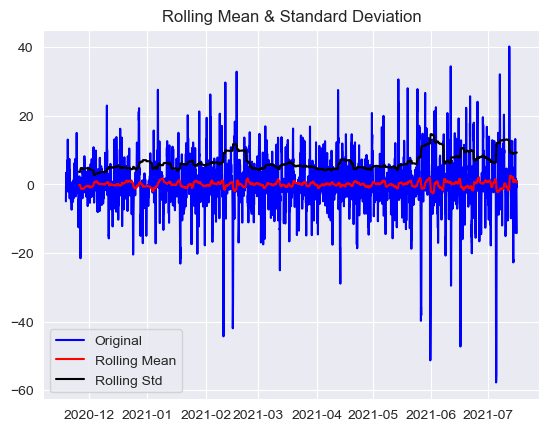

Results of Dickey-Fuller Test:

Test Statistic                -9.057427
p-value                             0.0
#Lags Used                        168.0
Number of Observations Used      5584.0
Critical Value (1%)             -3.4315
Critical Value (5%)             -2.8621
Critical Value (10%)            -2.5670
dtype: object


In [78]:
test_stationarity(residuals)

### 2.2 ARIMA Model and Forecasting

/opt/anaconda3/envs/DynamoData/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RMSE ARIMA: 17.047932972911994
                           kWhDelivered_total  Forecast ARIMA
start_hour                                                   
2021-07-16 10:00:00-07:00           20.891495       33.040129
2021-07-16 11:00:00-07:00           30.197282       32.059904
2021-07-16 12:00:00-07:00           18.698633       31.190802
2021-07-16 13:00:00-07:00            3.583797       35.304767
2021-07-16 14:00:00-07:00            2.994497       29.627123
...                                       ...             ...
2021-09-14 04:00:00-07:00            5.963001        7.426508
2021-09-14 05:00:00-07:00            5.963001        9.342370
2021-09-14 06:00:00-07:00            5.963001       14.542284
2021-09-14 07:00:00-07:00            4.608075       33.310776
2021-09-14 08:00:00-07:00            0.000000       50.205232

[1439 rows x 2 columns]


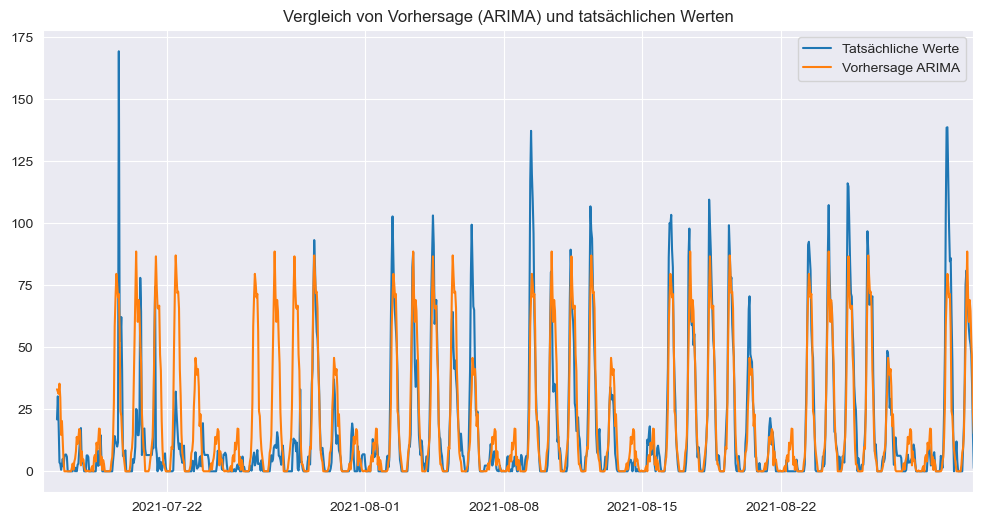

In [81]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Vorhersage des Trends
trend_forecast = np.linspace(trend.iloc[-1], trend.iloc[-1] + (trend.iloc[-1] - trend.iloc[-2]), len(test_X_kWh))

# Vorhersage der Saisonalitäten:
seasonal_forecast = np.zeros(len(test_X_kWh))
for i in range(seasonal.shape[1]): # Iteriere durch die Saisonkomponenten
    seasonal_component = seasonal.iloc[:, i].values
    period = [24, 24*7][i] #Entsprechende Periode der Saisonkomponente
    seasonal_forecast += np.tile(seasonal_component[-period:], len(test_X_kWh) // period + 1)[:len(test_X_kWh)]

#Anpassen eines ARIMA Modells an die Residuen (p,d,q müssen passend gewählt werden)
arima_model = ARIMA(residuals, order=(1,0,1), freq='h').fit()

#Vorhersage der Residuen
residuals_forecast = arima_model.forecast(steps=len(test_X_kWh))

# Kombinieren aller Komponenten
forecast_arima = trend_forecast + seasonal_forecast + residuals_forecast
forecast_arima = np.clip(forecast_arima, a_min=0, a_max=None) # set all negative values to 0

# Erstellen eines Pandas Series mit dem richtigen Index
forecast_arima_series = pd.Series(forecast_arima, index=test_X_kWh.index, name='Forecast ARIMA')

#Evaluierung der Ergebniss
rmse_arima = np.sqrt(mean_squared_error(test_X_kWh[1:], forecast_arima_series[1:]))
print(f"RMSE ARIMA: {rmse_arima}")

# Vergleich und Visualisierung
results_arima = pd.concat([test_X_kWh, forecast_arima_series], axis=1)
print(results_arima)


plt.figure(figsize=(12, 6))
plt.plot(test_X_kWh, label='Tatsächliche Werte')
plt.plot(forecast_arima_series, label='Vorhersage ARIMA')
plt.legend()
plt.title('Vergleich von Vorhersage (ARIMA) und tatsächlichen Werten')
# Vergleich und Visualisierung (begrenzt auf den ersten Monat mit plt.xlim)
start_date_plot = pd.to_datetime('2021-07-16')
end_date_plot = pd.to_datetime('2021-09-01')
plt.xlim(start_date_plot, end_date_plot) # Begrenzung der x-Achse

plt.show()

***
ab hier nur zum testen

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Korrekter Import
from sklearn.linear_model import LinearRegression

# # Vorhersage des Trends
trend_forecast = np.linspace(trend.iloc[-1], trend.iloc[-1] + (trend.iloc[-1] - trend.iloc[-2]), len(test_X_kWh))

# # Anpassen des linearen Regressionsmodells an den Trend
# trend_model = LinearRegression()
# trend_model.fit(train_X_kWh.values.reshape(-1, 1), trend.values.reshape(-1, 1)) # Reshape für sklearn erforderlich

# Vorhersage des Trends mit linearer Regression
# Erstelle Zeitstempel für den Testzeitraum
test_time = pd.Series(range(len(train_X_kWh), len(train_X_kWh) + len(test_X_kWh)), index=test_X_kWh.index)
trend_forecast = trend_model.predict(test_time.values.reshape(-1, 1)).flatten() # Reshape und flatten für korrekte Form


# Vorhersage der Saisonalitäten:
seasonal_forecast = np.zeros(len(test_X_kWh))
for i in range(seasonal.shape[1]): # Iteriere durch die Saisonkomponenten
    seasonal_component = seasonal.iloc[:, i].values  # <- Korrektur: .iloc + .values

    period = [24, 24*7][i] #Entsprechende Periode der Saisonkomponente
    seasonal_forecast += np.tile(seasonal_component[-period:], len(test_X_kWh) // period + 1)[:len(test_X_kWh)]

#Anpassen eines ARIMA Modells an die Residuen (p,d,q müssen passend gewählt werden)
arima_model = ARIMA(residuals, order=(1,0,1), freq='h').fit() # Hier musst du die Parameter (p, d, q) anpassen
#Vorhersage der Residuen
residuals_forecast = arima_model.forecast(steps=len(test_X_kWh))

# Kombinieren aller Komponenten
forecast_arima = trend_forecast + seasonal_forecast + residuals_forecast

# Erstellen eines Pandas Series mit dem richtigen Index
forecast_arima_series = pd.Series(forecast_arima, index=test_X_kWh.index, name='Forecast ARIMA')

# #Evaluierung der Ergebnisse (z.B. mit RMSE, MAE)
rmse_arima = np.sqrt(mean_squared_error(test_X_kWh[1:], forecast_arima_series[1:]))
# mae_arima = mean_absolute_error(test_X_kWh, forecast_arima_series)
#
print(f"RMSE ARIMA: {rmse_arima}")
# print(f"MAE ARIMA: {mae_arima}")

# Vergleich und Visualisierung
results_arima = pd.concat([test_X_kWh, forecast_arima_series], axis=1)
print(results_arima)

plt.figure(figsize=(12, 6))
plt.plot(test_X_kWh, label='Tatsächliche Werte')
plt.plot(forecast_arima_series, label='Vorhersage ARIMA')
plt.legend()
plt.title('Vergleich von Vorhersage (ARIMA) und tatsächlichen Werten')

# Vergleich und Visualisierung (begrenzt auf den ersten Monat mit plt.xlim)
start_date_plot = pd.to_datetime('2021-07-01')
end_date_plot = pd.to_datetime('2021-08-01')
# plt.xlim(start_date_plot, end_date_plot) # Begrenzung der x-Achse

plt.show()


***

## 3 Neural Network